In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the datetime module from the datetime library.
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

import time

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

596

In [91]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Loop through all the cities in the list.
set_count = 1
record_count = 1

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = "https://api.openweathermap.org/data/2.5/weather?&q=" + city.replace(" ","+") + "&units=Imperial&APPID="+weather_api_key

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | moses lake
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | orlik
Processing Record 5 of Set 1 | jiangyou
Processing Record 6 of Set 1 | churapcha
Processing Record 7 of Set 1 | hami
Processing Record 8 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 9 of Set 1 | ibra
Processing Record 10 of Set 1 | verkhoyansk
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | luderitz
Processing Record 13 of Set 1 | ponta do sol
Processing Record 14 of Set 1 | atuona
Processing Record 15 of Set 1 | avarua
Processing Record 16 of Set 1 | baykit
Processing Record 17 of Set 1 | hobart
Processing Record 18 of Set 1 | havre-saint-pierre
Processing Record 19 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 20 of Set 1 | kodiak
Processing Record 21 of Set 1 | albany
Processing Record 22

Processing Record 38 of Set 4 | airai
Processing Record 39 of Set 4 | leningradskiy
Processing Record 40 of Set 4 | pachino
Processing Record 41 of Set 4 | kautokeino
Processing Record 42 of Set 4 | gannan
Processing Record 43 of Set 4 | severo-kurilsk
Processing Record 44 of Set 4 | torbay
Processing Record 45 of Set 4 | tual
Processing Record 46 of Set 4 | sioux lookout
Processing Record 47 of Set 4 | peleduy
Processing Record 48 of Set 4 | sept-iles
Processing Record 49 of Set 4 | half moon bay
Processing Record 50 of Set 4 | castro
Processing Record 1 of Set 5 | sao filipe
Processing Record 2 of Set 5 | beringovskiy
Processing Record 3 of Set 5 | krasnyy chikoy
Processing Record 4 of Set 5 | milton
Processing Record 5 of Set 5 | esperance
Processing Record 6 of Set 5 | fare
Processing Record 7 of Set 5 | askino
Processing Record 8 of Set 5 | bekovo
Processing Record 9 of Set 5 | novokizhinginsk
Processing Record 10 of Set 5 | ewa beach
Processing Record 11 of Set 5 | taltal
Process

Processing Record 30 of Set 8 | severo-yeniseyskiy
Processing Record 31 of Set 8 | kraskino
Processing Record 32 of Set 8 | udayagiri
Processing Record 33 of Set 8 | shipitsyno
Processing Record 34 of Set 8 | walvis bay
Processing Record 35 of Set 8 | barbacena
Processing Record 36 of Set 8 | marsa matruh
Processing Record 37 of Set 8 | salinas
Processing Record 38 of Set 8 | borba
Processing Record 39 of Set 8 | nyurba
Processing Record 40 of Set 8 | lashio
Processing Record 41 of Set 8 | birao
Processing Record 42 of Set 8 | hanzhong
Processing Record 43 of Set 8 | bronnoysund
Processing Record 44 of Set 8 | salina cruz
Processing Record 45 of Set 8 | kudat
Processing Record 46 of Set 8 | ostersund
Processing Record 47 of Set 8 | kloulklubed
Processing Record 48 of Set 8 | mehamn
Processing Record 49 of Set 8 | jimenez
Processing Record 50 of Set 8 | union
Processing Record 1 of Set 9 | khatanga
Processing Record 2 of Set 9 | ust-tsilma
Processing Record 3 of Set 9 | asau
Processing 

Processing Record 19 of Set 12 | qaqortoq
Processing Record 20 of Set 12 | hastings
Processing Record 21 of Set 12 | touros
Processing Record 22 of Set 12 | poshekhonye
Processing Record 23 of Set 12 | maracacume
Processing Record 24 of Set 12 | vorobyevka
Processing Record 25 of Set 12 | play cu
City not found. Skipping...
Processing Record 26 of Set 12 | smithers
Processing Record 27 of Set 12 | martapura
Processing Record 28 of Set 12 | fort morgan
Processing Record 29 of Set 12 | araouane
Processing Record 30 of Set 12 | waw
Processing Record 31 of Set 12 | sand springs
Processing Record 32 of Set 12 | tura
Processing Record 33 of Set 12 | magdalena
Processing Record 34 of Set 12 | resende
Processing Record 35 of Set 12 | vestmanna
Processing Record 36 of Set 12 | aktash
Processing Record 37 of Set 12 | galesong
Processing Record 38 of Set 12 | ipixuna
Processing Record 39 of Set 12 | pedernales
Processing Record 40 of Set 12 | nagato
Processing Record 41 of Set 12 | san quintin
Pr

In [92]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Moses Lake,47.13,-119.28,80.60,24,1,6.93,US,2020-08-22 21:53:35
1,Punta Arenas,-53.15,-70.92,41.00,65,40,32.21,CL,2020-08-22 21:53:35
2,Vaini,-21.20,-175.20,77.00,88,40,10.29,TO,2020-08-22 21:51:50
3,Orlik,52.52,99.83,50.04,79,100,1.59,RU,2020-08-22 21:53:36
4,Jiangyou,31.77,104.72,71.87,86,100,4.16,CN,2020-08-22 21:53:37
5,Churapcha,62.00,132.43,45.36,56,0,5.66,RU,2020-08-22 21:53:37
6,Hami,42.80,93.45,74.57,28,0,7.27,CN,2020-08-22 21:53:38
7,Ibra,22.69,58.53,79.52,69,99,3.58,OM,2020-08-22 21:53:39
8,Verkhoyansk,67.54,133.38,39.67,73,81,2.73,RU,2020-08-22 21:53:39
9,Puerto Ayora,-0.74,-90.35,73.40,64,84,18.34,EC,2020-08-22 21:51:26


In [93]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [94]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

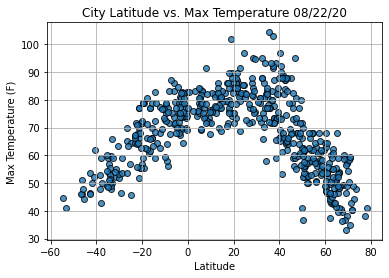

In [95]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

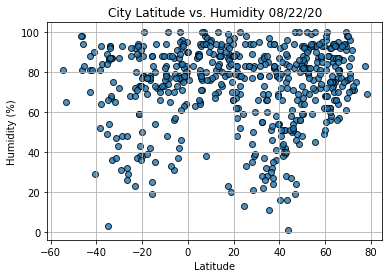

In [96]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

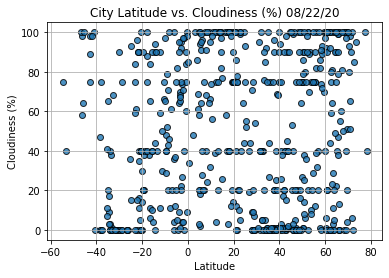

In [97]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

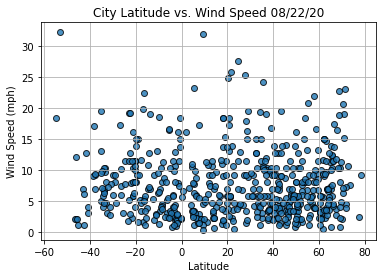

In [98]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [99]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [107]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values,y_values,title,y_label,text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    plt.title(title)
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

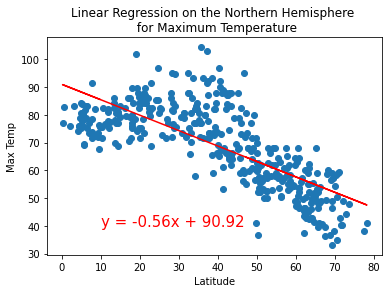

In [110]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values,y_values,"Linear Regression on the Northern Hemisphere \n for Maximum Temperature","Max Temp",(10,40))

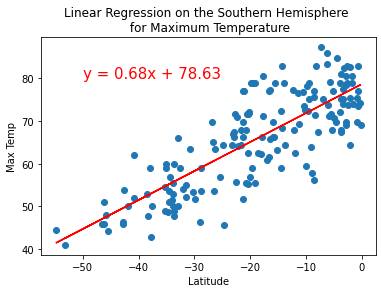

In [111]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,80))

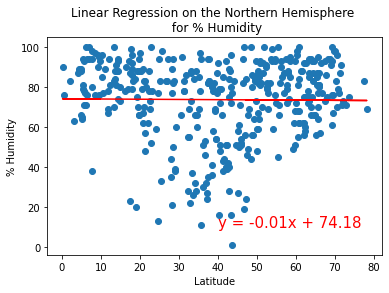

In [112]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

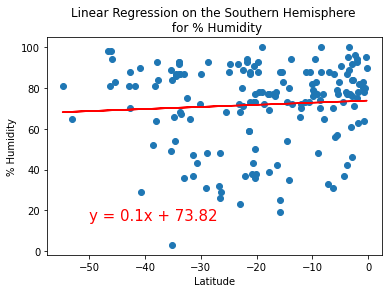

In [113]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

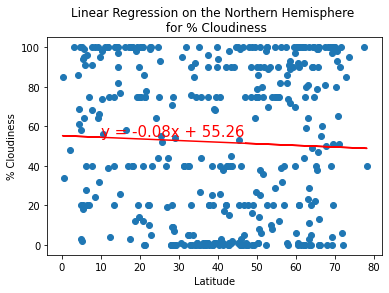

In [115]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,55))

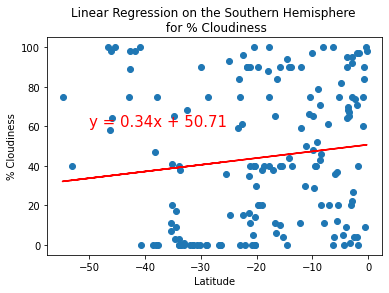

In [117]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

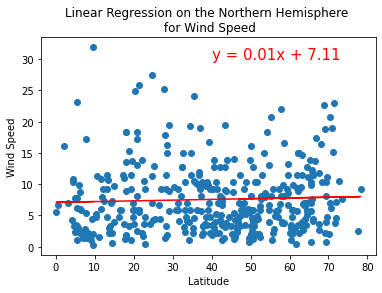

In [120]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,30))

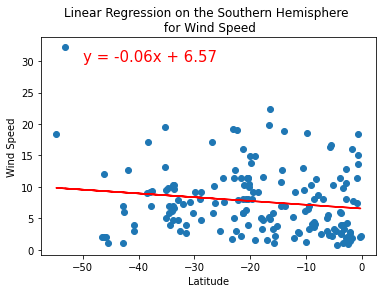

In [122]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,30))